# El método del codo y el factor de la silueta del clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_samples, silhouette_score

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8])
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3])

X = np.array(list(zip(x1,x2))).reshape(len(x1), 2)

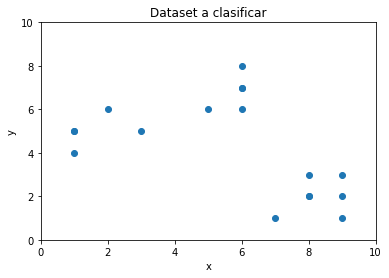

In [4]:
plt.plot()
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Dataset a clasificar')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x1, x2)
plt.show()

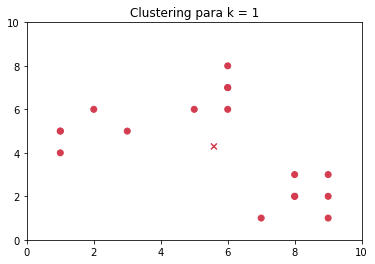

* Para k =  2  el promedio de la silueta es de:  0.611342436871
  - Para i =  1  la silueta del cluster value:  0.497044509583
  - Para i =  2  la silueta del cluster value:  0.774625190139


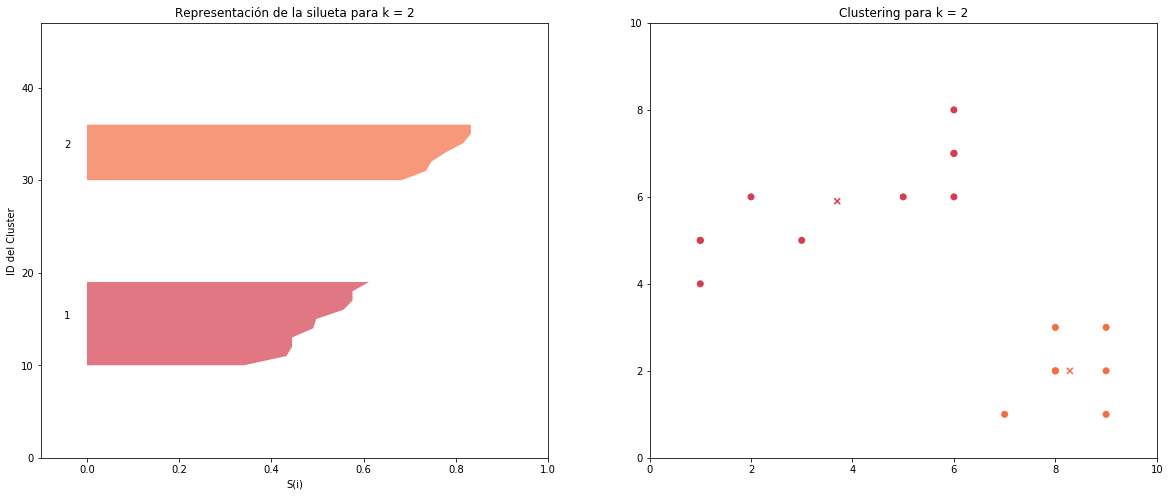

* Para k =  3  el promedio de la silueta es de:  0.712207938329
  - Para i =  1  la silueta del cluster value:  0.66095088639
  - Para i =  2  la silueta del cluster value:  0.734525736468
  - Para i =  3  la silueta del cluster value:  0.732220072873


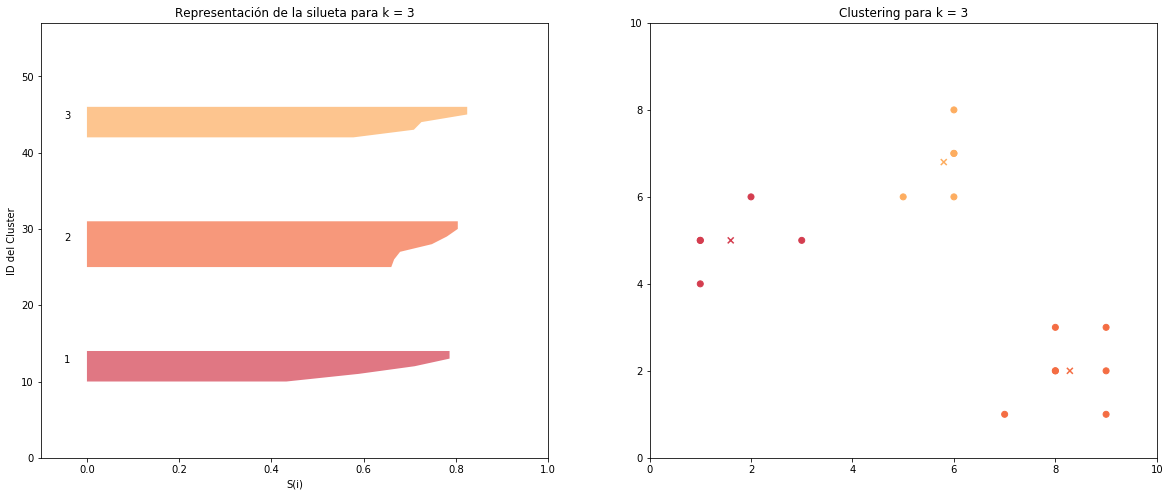

* Para k =  4  el promedio de la silueta es de:  0.638994864313
  - Para i =  1  la silueta del cluster value:  0.240969295176
  - Para i =  2  la silueta del cluster value:  0.734525736468
  - Para i =  3  la silueta del cluster value:  0.654458796163
  - Para i =  4  la silueta del cluster value:  0.655666655624


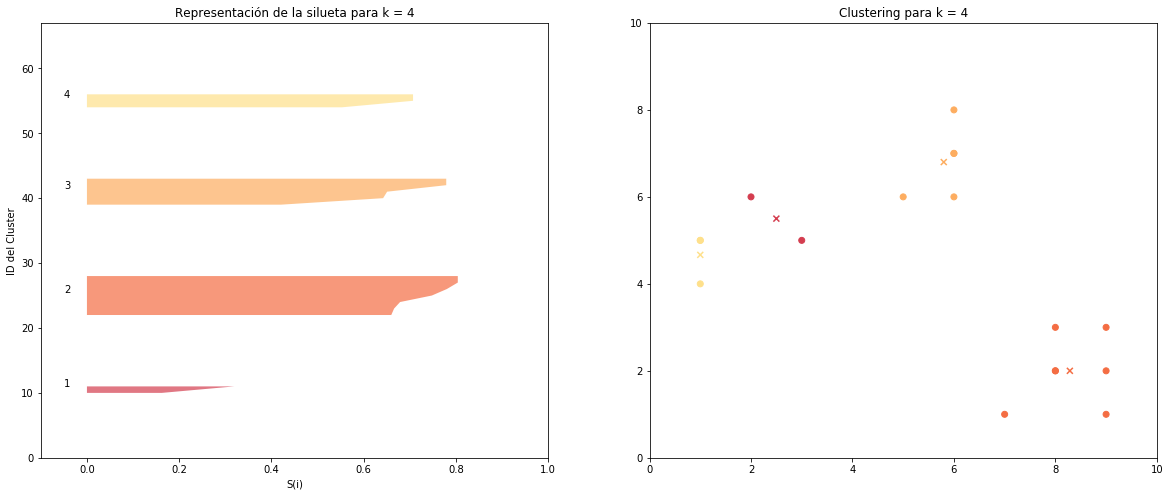

* Para k =  5  el promedio de la silueta es de:  0.469833743758
  - Para i =  1  la silueta del cluster value:  0.0
  - Para i =  2  la silueta del cluster value:  0.240969295176
  - Para i =  3  la silueta del cluster value:  0.654458796163
  - Para i =  4  la silueta del cluster value:  0.377656850973
  - Para i =  5  la silueta del cluster value:  0.655666655624


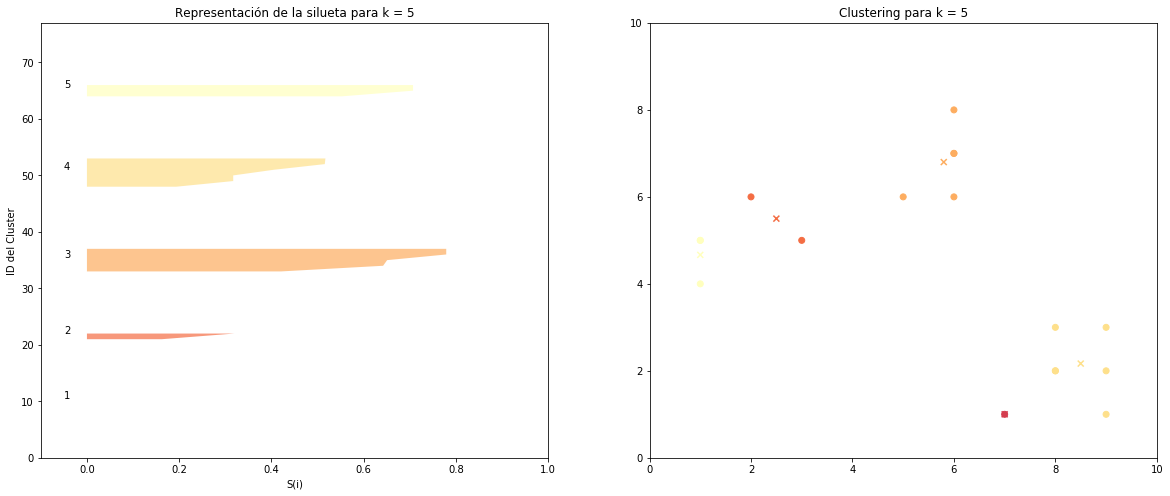

* Para k =  6  el promedio de la silueta es de:  0.442775297993
  - Para i =  1  la silueta del cluster value:  0.30288958669
  - Para i =  2  la silueta del cluster value:  0.654458796163
  - Para i =  3  la silueta del cluster value:  0.655666655624
  - Para i =  4  la silueta del cluster value:  0.0
  - Para i =  5  la silueta del cluster value:  0.240969295176
  - Para i =  6  la silueta del cluster value:  0.300042088616


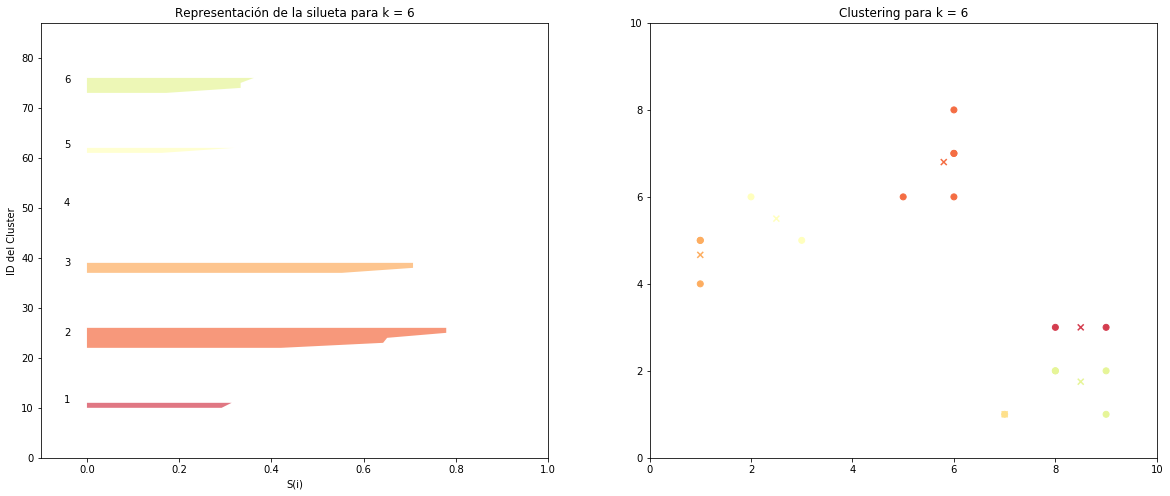

* Para k =  7  el promedio de la silueta es de:  0.32731655056
  - Para i =  1  la silueta del cluster value:  0.240969295176
  - Para i =  2  la silueta del cluster value:  0.263812295212
  - Para i =  3  la silueta del cluster value:  0.329954017974
  - Para i =  4  la silueta del cluster value:  0.655666655624
  - Para i =  5  la silueta del cluster value:  0.317000534993
  - Para i =  6  la silueta del cluster value:  0.0
  - Para i =  7  la silueta del cluster value:  0.0


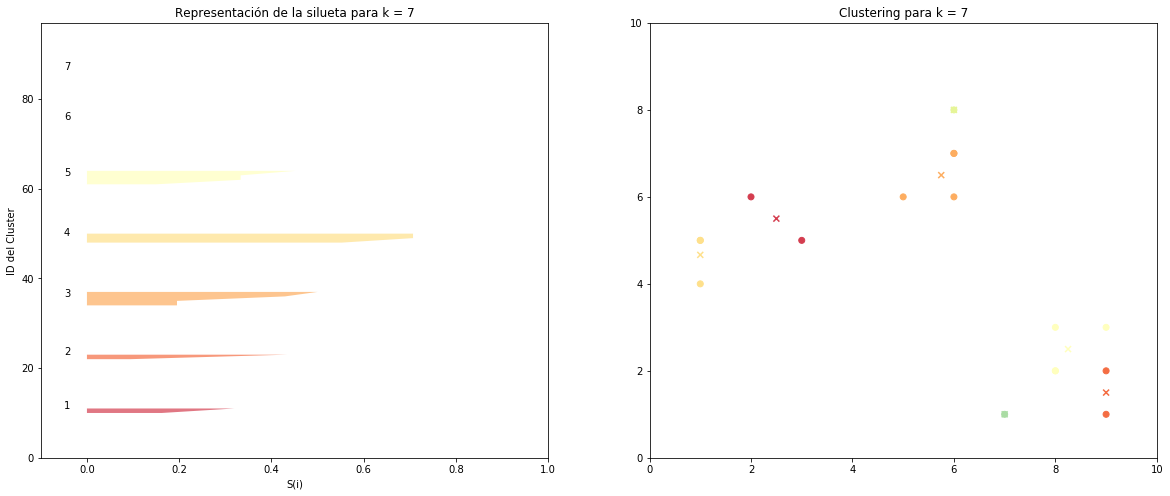

* Para k =  8  el promedio de la silueta es de:  0.330621564796
  - Para i =  1  la silueta del cluster value:  0.328820426377
  - Para i =  2  la silueta del cluster value:  0.203637567825
  - Para i =  3  la silueta del cluster value:  0.655666655624
  - Para i =  4  la silueta del cluster value:  0.240969295176
  - Para i =  5  la silueta del cluster value:  0.566478973418
  - Para i =  6  la silueta del cluster value:  0.0
  - Para i =  7  la silueta del cluster value:  0.0
  - Para i =  8  la silueta del cluster value:  0.0


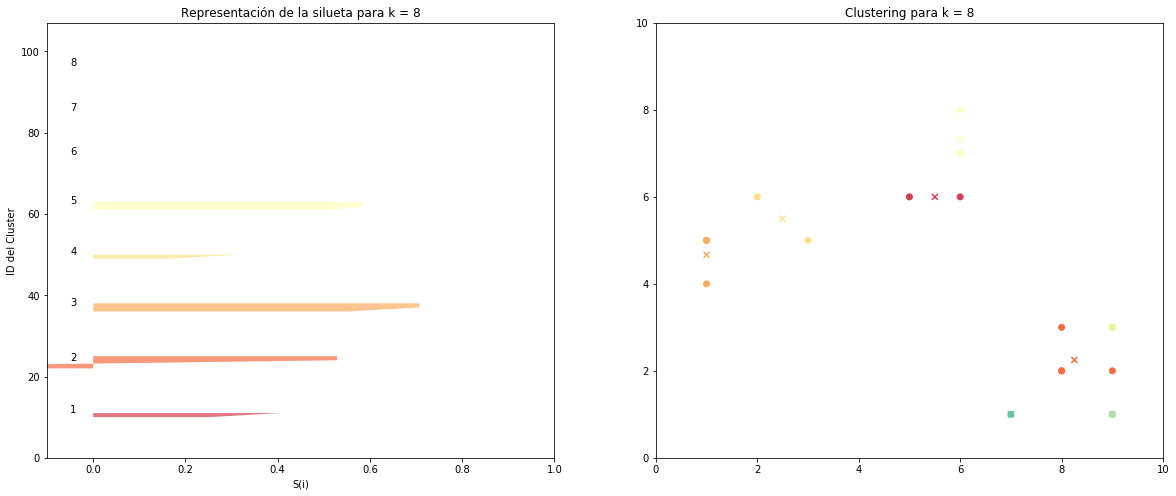

* Para k =  9  el promedio de la silueta es de:  0.34011594849
  - Para i =  1  la silueta del cluster value:  0.328820426377
  - Para i =  2  la silueta del cluster value:  0.390524291751
  - Para i =  3  la silueta del cluster value:  0.615226541104
  - Para i =  4  la silueta del cluster value:  0.566478973418
  - Para i =  5  la silueta del cluster value:  0.0
  - Para i =  6  la silueta del cluster value:  0.0
  - Para i =  7  la silueta del cluster value:  0.0
  - Para i =  8  la silueta del cluster value:  0.203820426377
  - Para i =  9  la silueta del cluster value:  0.0


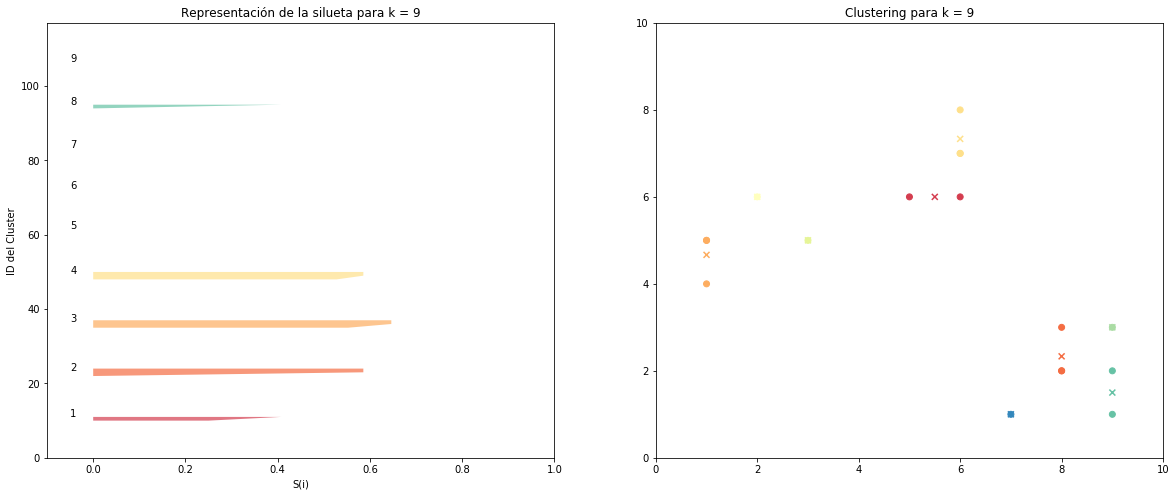

In [6]:
max_k = 10
K = range(1, max_k)
ssw = []
color_palette = [plt.cm.Spectral(float(i) / max_k) for i in K]
centroid = [sum(X) / len(X) for i in K]
sst = sum(np.min(cdist(X, centroid, 'euclidean'), axis = 1))

for k in K:
    kmeanModel = KMeans(n_clusters = k).fit(X)
    
    centers = pd.DataFrame(kmeanModel.cluster_centers_)
    labels = kmeanModel.labels_
    
    ssw_k = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis = 1))
    ssw.append(ssw_k)
    
    label_color = [color_palette[i] for i in labels]
    
    if 1 < k < len(X):
        fig, (axis1, axis2) = plt.subplots(1, 2)
        fig.set_size_inches(20, 8)
        
        axis1.set_xlim((-0.1, 1.0))
        axis1.set_ylim((0, len(X) + (k + 1) * 10))
        
        silhouette_avg = silhouette_score(X, labels)
        print('* Para k = ', k, ' el promedio de la silueta es de: ', silhouette_avg)
        sample_silhouette_values = silhouette_samples(X, labels)
        
        y_lower = 10
        for i in range(k):
            ith_cluster_sv = sample_silhouette_values[labels == i]
            print('  - Para i = ', i + 1, ' la silueta del cluster value: ', np.mean(ith_cluster_sv))
            ith_cluster_sv.sort()
            
            ith_cluster_size = ith_cluster_sv.shape[0]
            y_upper = y_lower + ith_cluster_size
            
            color = color_palette[i]
            
            axis1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sv, facecolor = color, alpha = 0.7)
            
            axis1.text(-0.05, y_lower + 0.5 * ith_cluster_size, str(i + 1))
            
            y_lower = y_upper + 10
            
        axis1.set_title('Representación de la silueta para k = %s'%str(k))
        axis1.set_xlabel('S(i)')
        axis1.set_ylabel('ID del Cluster')
        
    plt.plot()
    plt.xlim([0, 10])
    plt.ylim([0, 10])
    plt.title('Clustering para k = %s'%str(k))
    plt.scatter(x1, x2, c = label_color)
    plt.scatter(centers[0], centers[1], c = color_palette, marker = 'x')
    plt.show()

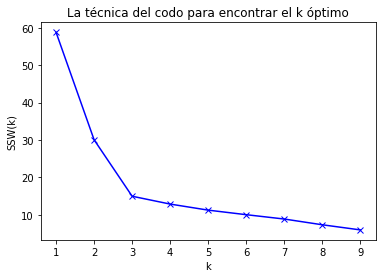

In [8]:
# Representación del codo

plt.plot(K, ssw, 'bx-')
plt.xlabel('k')
plt.ylabel('SSW(k)')
plt.title('La técnica del codo para encontrar el k óptimo')
plt.show()

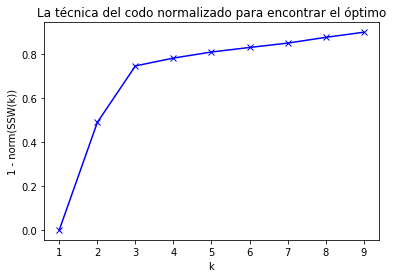

In [10]:
# Representación del codo normalizado

plt.plot(K, 1 - ssw / sst, 'bx-')
plt.xlabel('k')
plt.ylabel('1 - norm(SSW(k))')
plt.title('La técnica del codo normalizado para encontrar el óptimo')
plt.show()